In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys

In [3]:
mito_code = '/home/falcon/Development/unet-training/a-fully-supervised-unet/'
weights = os.path.join(mito_code, 'models/jain/weights.675.hdf5')

In [4]:
sys.path.append(mito_code)
import data_management
from data_management import load_stack
from data_management import load_data

import interactive_plot

import metrics
from metrics import statistics
from metrics import confusion_matrix
from metrics import error_distribution
from metrics import error_borders
from metrics import PR_curve

import generator_extended

import unet
from unet import load_model_unet
from unet import predict_net
from unet import get_unet
from unet import train
from unet import execute_predict

In [5]:
import mahotas as mh
from PIL import Image

In [6]:
img_dir = '/home/falcon/Thesis/test-img-newdata3/'
img1 = os.path.join(img_dir, '000000_000002_001021_000000.jpg')

In [7]:
img = mh.imread(img1)
# TODO maybe invert the image

In [8]:
img[0][0]

64

In [9]:
img.shape

(4096, 6144)

In [10]:
img[490, 786]

132

In [11]:
img_inverted = 255 - img

In [12]:
img_inverted.shape

(4096, 6144)

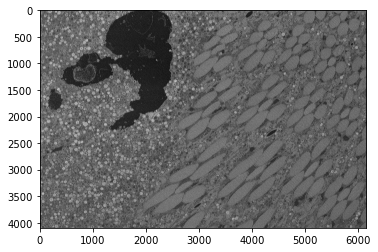

In [13]:
imshow(img, cmap='gray')

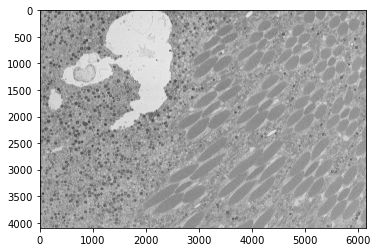

In [14]:
imshow(img_inverted, cmap='gray')

In [15]:
model = load_model_unet(weights)

In [16]:
img_inverted_normalized = img_inverted.astype(float)

In [17]:
img_inverted_normalized /= 255

In [18]:
img_copy = np.zeros((1, img.shape[0], img.shape[1], 1))

In [19]:
img_copy.shape

(1, 4096, 6144, 1)

In [20]:
img_copy[0,:,:,0] = img_inverted_normalized[:,:]

In [21]:
temp_img = Image.fromarray(img_copy[0, :, :, 0])

In [22]:
temp_img = temp_img.resize((512,512), resample=Image.NEAREST)

In [23]:
img_inverted_normalized_resized = numpy.asarray(temp_img)

In [24]:
img_inverted_normalized_resized.shape

(512, 512)

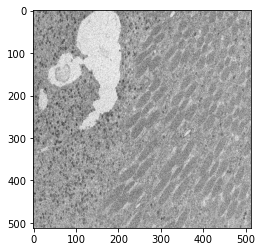

In [25]:
imshow(img_inverted_normalized_resized, cmap='gray')

In [26]:
img_copy_resized = np.zeros((1, img_inverted_normalized_resized.shape[0], img_inverted_normalized_resized.shape[1], 1))

In [27]:
img_copy_resized.shape

(1, 512, 512, 1)

In [28]:
img_copy_resized[0,:,:,0] = img_inverted_normalized_resized[:,:]

In [29]:
pred = predict_net(model, img_copy_resized)

1/1 [==============================] - 0s 756us/step


In [30]:
pred.shape

(1, 512, 512, 1)

In [31]:
pred_img = pred[0,:,:,0]

In [32]:
pred_img.shape

(512, 512)

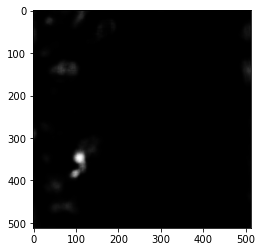

In [33]:
imshow(pred_img, cmap='gray')